In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
data = pd.read_csv("D:/Code/python/mat3533/practice09/data/Sales_Transactions_Dataset_Weekly.csv")
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [4]:
transactions = data.drop(['Product_Code'], axis=1)
transactions.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(transactions)

print(train_x.shape)

(811, 106)


In [6]:
num_clusters = range(5, 16)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_x)
    inertia.append(kmeans.inertia_)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

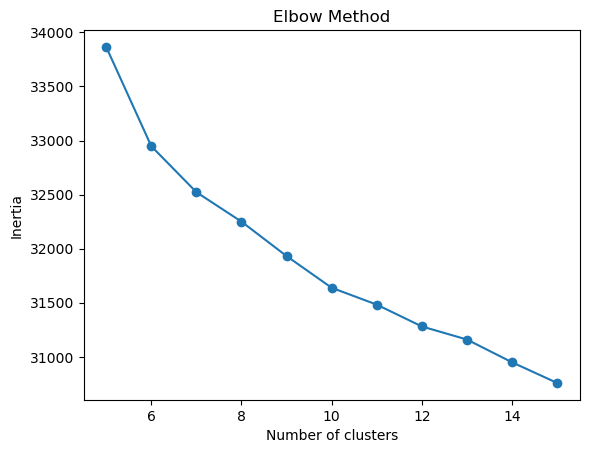

In [7]:
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [9]:
def calculate_second_derivative(inertia):
    second_derivative = np.gradient(np.gradient(inertia))
    return second_derivative

# Xác định điểm Elbow bằng cách tính toán đạo hàm hai lần
def find_elbow_point(inertia):
    second_derivative = calculate_second_derivative(inertia)
    # Tìm vị trí của điểm có giá trị đạo hàm hai lần nhỏ nhất
    elbow_point = np.argmin(second_derivative)
    return elbow_point

elbow_point = find_elbow_point(inertia)
print(elbow_point)

8


In [10]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    for k in range(K):
        Xk = X[label == k, :]
        plt.plot(Xk[:, 0], Xk[:, 1], 'o', label='Cluster {}'.format(k))
    plt.axis('equal')
    plt.legend()

    plt.show()

def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
    set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break

        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centers found by scikit-learn:
[[-7.32091465e-01 -7.14638843e-01 -7.12055341e-01 -7.11385109e-01
  -7.23431173e-01 -7.30980929e-01 -7.22544993e-01 -7.27495629e-01
  -7.19488932e-01 -7.27407618e-01 -7.13052242e-01 -7.38827297e-01
  -7.25245176e-01 -7.26028063e-01 -7.28739333e-01 -7.21830812e-01
  -7.17454378e-01 -7.33013057e-01 -7.24551744e-01 -7.26942136e-01
  -7.19902804e-01 -7.42719976e-01 -7.48138415e-01 -7.63881884e-01
  -8.04460027e-01 -8.51476072e-01 -7.16077722e-01 -7.29701620e-01
  -7.15511717e-01 -7.15398868e-01 -7.06540063e-01 -7.21015966e-01
  -7.16261596e-01 -7.20099964e-01 -7.30492275e-01 -7.23749378e-01
  -7.24094723e-01 -7.37483435e-01 -7.20842527e-01 -7.26348274e-01
  -7.19047404e-01 -7.26836006e-01 -7.37978164e-01 -7.27421988e-01
  -7.31464093e-01 -7.39212883e-01 -7.26092504e-01 -7.45049862e-01
  -7.65357985e-01 -7.89500691e-01 -8.10704725e-01 -8.77379309e-01
  -5.90773751e-01 -8.44827394e-01 -9.43851918e-01 -7.82160084e-01
  -8.97452482e-01 -9.22862609e-01 -8.93656051

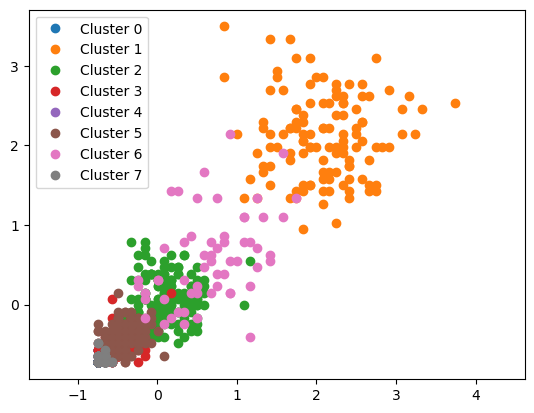

In [11]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(train_x)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(train_x)
kmeans_display(train_x, pred_label)